# Data Analysis
In this lecture we will go over some of the basic data analysis principles within Python. This will include file I/O (input and output), processing data, some popular analysis techniques, and a few data visualization techniques.

These examples are NOT meant to be comprehensive. Only a handful of popular techniques are covered. The purpose is to provide an overview and expose students to data analysis techniques and packages available in Python.

Examples adapted from: http://www.cs.utsa.edu/~jruan/teaching/cs5163f17/#schedule, https://saskeli.github.io/data-analysis-with-python-summer-2019/

## Loading (and Saving)
This section will show some of the most common ways of getting data in and out of Python. We will cover the built in python functions and well as introduce some package specific functions.

### Built-in methods

In [1]:
# Clear out old file if it exists
# The "os" package provides file system access
import os

if os.path.exists('test_file.csv'):
    os.remove('test_file.csv')

lines = []
lines.append('col1,col2,col3,col4')
lines.append('1,2,3,4')
lines.append('5,6,,8')
print(lines)

In [2]:
# Join the data and seperate lines with a new line charactor
data = '\n'.join(lines)
# Write the data to the file and close it
file_ = open('test_file.csv', 'w+')
file_.write(data)
file_.close()

In [3]:
# Open the file and read it
file_ = open('test_file.csv', 'r')
print(file_.read())
file_.close()

col1,col2,col3,col4
1,2,3,4
5,6,,8


### Package specific methods (numpy, pandas)

In [4]:
# Pandas
import pandas as pd
data = pd.read_csv('test_file.csv')
print(data)

   col1  col2  col3  col4
0     1     2   3.0     4
1     5     6   NaN     8


In [5]:
# Numpy
import numpy as np
data = np.genfromtxt('test_file.csv', delimiter=',')
print(data)

[[nan nan nan nan]
 [ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]]


## Preprocessing and Cleaning
In this section, we will show a few examples of ways you might clean and pre-process your data before running analysis. We'll use some popular packages like pandas as they have a lot of helpful built in utilities.

### Fixing data problems (interpolation, etc...)
Issues we will tackle in this section:
1. Missing Data (Method -> Default Values)
3. Remove Incomplete Rows
4. Normalize
5. Rename Columns

In [6]:
# First let read in the data so we have something to work with
import pandas as pd
file_data = pd.read_csv('test_file.csv')
print(file_data)

   col1  col2  col3  col4
0     1     2   3.0     4
1     5     6   NaN     8


In [7]:
# Using pandas, we'll replace any missing data
# We'll replace missing values with a default value.
# NOTE: this is probably NOT the best way to handle missing values
data = file_data.fillna(100)
print(data)

   col1  col2   col3  col4
0     1     2    3.0     4
1     5     6  100.0     8


In [8]:
# We could instead fill in the missing data with the average value
# This is better but may still not be the best method
data = file_data.fillna(file_data.col3.mean())
print(data)

   col1  col2  col3  col4
0     1     2   3.0     4
1     5     6   3.0     8


In [9]:
# Another method that you may use is to just remove all incomplete rows
data = file_data.dropna()
print(data)

   col1  col2  col3  col4
0     1     2   3.0     4


In [10]:
# You can normalize the data n the columns as well
# BONUS: When might you want to normalize data?
# First, get rid of NaNs in the data frame
data = file_data.fillna(4)
data = (data - data.min()) / (data.max() - data.min())
print(data)

   col1  col2  col3  col4
0   0.0   0.0   0.0   0.0
1   1.0   1.0   1.0   1.0


In [11]:
# It's also important to keep your data organized
# Here's how you change the column names for data
data = file_data = pd.read_csv('test_file.csv')
data = data.rename(columns = {'col1': 'A', 'col2': 'B', 'col3': 'C'})
print(data)

   A  B    C  col4
0  1  2  3.0     4
1  5  6  NaN     8


### REGEX
Regular expressions are often used in cleaning data. Regular expressions allow you to match string to patterns. 

These are the basic rules:
- . Matches any character
- [...] Matches any character contained within the brackets
- [^...] Matches any character not appearing after the hat (ˆ)
- ˆ Matches the start of the string
- \$ Matches the end of the string
- \* Matches zero or more previous RE
- \+ Matches one or more previous RE
- {m,n} Matches m to n occurrences of previous RE
- \? Matches zero or one occurrences of previous RE
- \| Logical OR, denotes alternatives
- `\d` same as `[0-9]`, matches a digit
- `\D` same as `[ˆ0-9]`, matches anything but a digit
- `\s` matches a whitespace character (space, newline, tab, ... )
- `\S` matches a non-whitespace character
- `\w` same as `[a-zA-Z0-9_]`, matches one alphanumeric character
- `\W` matches one non-alphanumeric character


Let's look at some pattern matching cases with strings.

In [12]:
import re
test_string = "Doing things, going home, staying awake, sleeping later"
re.findall(r'\w+ing\b', test_string)

['Doing', 'going', 'staying', 'sleeping']

Notice this uses the "findall()" method. These are the most used methods in this package: 
- `re.match(pattern, str)`
     - Tries to find a match at the start of a string
- `re.search(pattern, str)`
    - Matches any substring of a string
- `re.findall(pattern, str)`
    - Matches all occurrences, returns a list of strings
- `re.finditer(pattern, str)`
    - Like findall but returns an iterator
- `re.sub(pattern, replacement, str, count=0)`
    - Replaces the first match with "replacement"

In [13]:
# This time with match
import re
test_string = "Doing things, going home, staying awake, sleeping later"
re.match(r'\w+ing\b', test_string)

<re.Match object; span=(0, 5), match='Doing'>

In [14]:
# Another example (addition operator parsing)
import re
test_string = "Doing things, going home, staying awake, sleeping later"
re.findall(r'[+-]?\d+', "23 + -24 = -1")

['23', '-24', '-1']

In [15]:
import re
test_string = 'He is the best.'
full_replace = re.sub(r'(\b[Hh]e\b)', r'\0Joel', test_string, 1)
back_replace = re.sub(r'(\b[Hh]e\b)', r'\1, Joel,', test_string, 1)
print(full_replace)
print(back_replace)

 Joel is the best.
He, Joel, is the best.


### Aggregating and grouping
Manipulating data sets is must have skill for data processing. This includes merging, concatenating, and grouping data together.

#### Concatenating data sets using Pandas

In [16]:
# Create a bunch of pandas dataframes so we can concatenate them together
def makedf(cols, ind):
    data = {c : [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

a = makedf("AB", [0,1])
b = makedf("AB", [2,3])
c = makedf("CD", [0,1])
d = makedf("BC", [2,3])

In [17]:
a

,A,B
0,A0,B0
1,A1,B1


In [18]:
b

,A,B
2,A2,B2
3,A3,B3


In [19]:
c

,C,D
0,C0,D0
1,C1,D1


In [20]:
d

,B,C
2,B2,C2
3,B3,C3


In [21]:
pd.concat([a,b])

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [22]:
pd.concat([a,a], ignore_index=False)

,A,B
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1


In [23]:
pd.concat([a,a], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


#### Merging data sets using Pandas
Consider how this behavior is different than concatenation

In [24]:
# Build some sample data sets for merging

df1 = pd.DataFrame([[1000, "Jack", 21], [1500, "John", 29]], 
                  columns=["Wage", "Name", "Age"])

df2 = pd.DataFrame({"Name" : ["John", "Jack"], 
                    "Occupation": ["Plumber", "Carpenter"]})

df3 = pd.concat([df2, pd.DataFrame({ "Name" : ["James"], 
                                    "Occupation":["Painter"]})], 
                ignore_index=True)

In [25]:
df1

,Wage,Name,Age
0,1000,Jack,21
1,1500,John,29


In [26]:
df2

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter


In [27]:
df3

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter
2,James,Painter


In [28]:
# Merge df1 and df2 (notice the 1:1 correspondance)
pd.merge(df1, df2)

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


In [29]:
# Merging df1 and df3 (no longer in a 1:1 correpondance)
pd.merge(df1, df3)  # defaults to inner joint

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


In [30]:
# But, we can change the join behavior
pd.merge(df1, df3, how="outer")   # Outer join

,Wage,Name,Age,Occupation
0,1000.0,Jack,21.0,Carpenter
1,1500.0,John,29.0,Plumber
2,NaN,James,NaN,Painter


#### Aggregating and Grouping using Pandas

In [31]:
# Load in some weather data
wx_data = pd.read_csv('kumpula-weather-2017.csv')
wx_data.head()

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


In [32]:
# Let's rename the columns a bit
wx_data = pd.read_csv('kumpula-weather-2017.csv')
wx_data = wx_data.rename(columns={"m": "Month", "d": "Day", "Precipitation amount (mm)" : "Precipitation",
                         "Snow depth (cm)" : "Snow", "Air temperature (degC)" : "Temperature"})
wx_data.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


In [33]:
# Using the pandas "groupby" function to group by month
groups = wx_data.groupby("Month")
groups

In [34]:
# "groupby" is a lazy operation, let's dig into what it returned
len(groups)

12

In [35]:
# What are the groups (it's iterable!)
for key, group in groups:
    print(key, len(group))

1 31
2 28
3 31
4 30
5 31
6 30
7 31
8 31
9 30
10 31
11 30
12 31


In [36]:
# We can look at different groups very easily
groups.get_group(7)

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
181,2017,7,1,00:00,UTC,0.1,-1.0,14.1
182,2017,7,2,00:00,UTC,-1.0,-1.0,16.4
183,2017,7,3,00:00,UTC,2.2,-1.0,14.5
184,2017,7,4,00:00,UTC,0.9,-1.0,14.1
185,2017,7,5,00:00,UTC,-1.0,-1.0,14.0
186,2017,7,6,00:00,UTC,-1.0,-1.0,11.5
187,2017,7,7,00:00,UTC,-1.0,-1.0,14.7
188,2017,7,8,00:00,UTC,0.3,-1.0,16.1
189,2017,7,9,00:00,UTC,-1.0,-1.0,17.4
190,2017,7,10,00:00,UTC,-1.0,-1.0,18.0


In [37]:
# There's a lot of nice things we can do with groups
groups["Temperature"].mean()

Month
1     -2.316129
2     -2.389286
3      0.983871
4      2.676667
5      9.783871
6     13.726667
7     16.035484
8     16.183871
9     11.826667
10     5.454839
11     3.950000
12     1.741935
Name: Temperature, dtype: float64

In [38]:
groups["Precipitation"].sum()

Month
1      26.9
2      21.0
3      29.7
4      26.9
5      -5.9
6      59.3
7      14.2
8      70.1
9      51.2
10    173.5
11    117.2
12    133.6
Name: Precipitation, dtype: float64

## Analysis
This section will show some basic examples of possible analysis. Note this is just a sample of basic techniques and serves as an introduction to popular methods. 

### Summary Stats
One of the first things people usually do with data is exploration. You have to learn a bit about your data before moving forward. A simple way to do this is look at the data and review its summary statistics

In [39]:
import pandas as pd

#Create a Dictionary of series
d = {'Name': pd.Series(['A','B','C','D','E','F','G','H','I','J','K','L']),
     'Age': pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
     'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}

#Create a DataFrame from the dictionary
data = pd.DataFrame(d)
data

,Name,Age,Rating
0,A,25,4.23
1,B,26,3.24
2,C,25,3.98
3,D,23,2.56
4,E,30,3.20
5,F,29,4.60
6,G,23,3.80
7,H,34,3.78
8,I,40,2.98
9,J,30,4.80


In [40]:
# You can access all basic stats directly on the dataframe
data.std()

Age       9.232682
Rating    0.661628
dtype: float64

In [41]:
# The full set of summary statics is just as easily attained
data.describe()

,Age,Rating
count,12.000000,12.000000
mean,31.833333,3.743333
std,9.232682,0.661628
min,23.000000,2.560000
25%,25.000000,3.230000
50%,29.500000,3.790000
75%,35.500000,4.132500
max,51.000000,4.800000


### ML (Naive Bayes Classification, Clustering, PCA)

#### Naive Bayes (Simple Classification)
Classify points drawn from Gaussian distributions

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

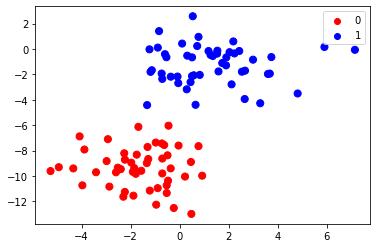

In [43]:
# Generate and plot the data
from sklearn.datasets import make_blobs
X,y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
colors = np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();

In [44]:
# Use Naive Bayes to build the model for classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);
print('Means: \n{}\n'.format(model.theta_))
print('Standard deviations: \n{}'.format(model.sigma_))

Means: 
[[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]

Standard deviations: 
[[2.06097005 2.47716872]
 [3.33164807 2.22401384]]


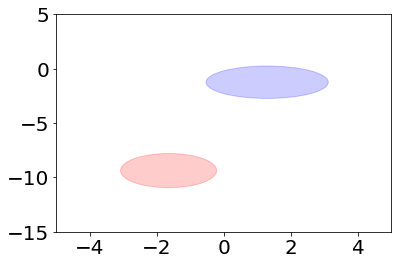

In [45]:
# Plot these fitted distributions that we can use to predict new points

def plot_ellipse(ax, mu, sigma, color="k", label=None):
    """
    Based on
    http://stackoverflow.com/questions/17952171/not-sure-how-to-fit-data-with-a-gaussian-python.
    """
    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color, label=label)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    return ellipse

plt.xlim(-5, 5)
plt.ylim(-15, 5)
plot_ellipse(plt.gca(), model.theta_[0], 
             np.identity(2)*model.sigma_[0], color="red")
plot_ellipse(plt.gca(), model.theta_[1], 
             np.identity(2)*model.sigma_[1], color="blue");

In [46]:
# This is obviously a toy example, of course this worked. Why?
# Let's check the accuracy!
from sklearn.metrics import accuracy_score
y_fitted = model.predict(X)
acc=accuracy_score(y,y_fitted)
print('Accuracy score: {}'.format(acc))

Accuracy score: 1.0


#### Clustering
We'll perform clustering using scikit-learn's k-means algorithm on toy data. This simple case will show how we can cluster points.

In [47]:
# Build up and plot the toy data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


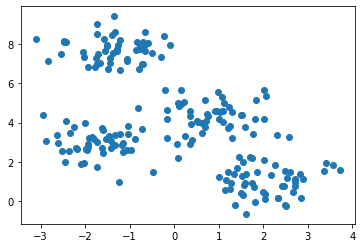

In [48]:
plt.scatter(X[:,0],X[:,1])

In [49]:
# Next we'll execute the clustering and print the cluster centers
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(X)
print(model.cluster_centers_)

[[-1.36512238  7.70188306]
 [ 2.07464749  0.9869902 ]
 [ 0.86008475  4.31501411]
 [-1.70639178  2.9104771 ]]


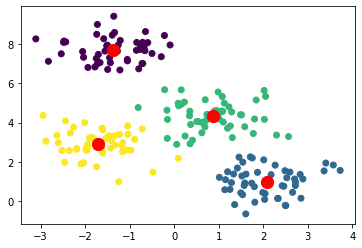

In [50]:
# Let's plot the cluster centers and original data broken up into clusters
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], 
            model.cluster_centers_[:,1], 
            s=150, color="red"); # Show the centres

#### Principle Component Analysis (PCA)
Principal component analysis is an unsupervised learning method that tries to detect the directions in which the vector formed data varies most. It first finds the direction of highest variance, and then proceeds to discover directions of highest variance that are orthogonal to those direction already found. So, for n dimensional data, it returns, by default, n orthogonal directions and the corresponding variances. These directions are called principal axes, and if we project a data point to these axes, we get the principal components of each axis. [https://saskeli.github.io/data-analysis-with-python-summer-2019/pca.html#Principal-component-analysis]

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA

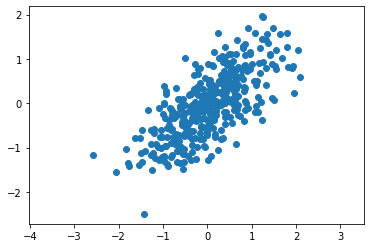

In [52]:
# Generate some random data for PCA analysis
rng = np.random.RandomState(0)
X = rng.randn(2,400)
scale = np.array([[1,0], [0,0.4]])  # Standard deviations are 1 and 0.4
rotate = np.array([[1,-1], [1,1]]) / math.sqrt(2)
transform = np.dot(rotate, scale)
X = np.dot(transform, X)
X = X.T
plt.axis('equal')
plt.scatter(X[:,0], X[:,1]);

In [53]:
# Find the principle components
from sklearn.decomposition import PCA
def arrow(v1, v2, ax):
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate("", v2, v1, arrowprops=arrowprops)
pca = PCA(2)
pca.fit(X)
print('Principal axes: \n{}'.format(pca.components_))
print('Explained variance: {}'.format(pca.explained_variance_))
print('Mean: {}'.format(pca.mean_))

Principal axes: 
[[-0.73072907 -0.68266758]
 [-0.68266758  0.73072907]]
Explained variance: [0.97980663 0.16031015]
Mean: [ 0.01333067 -0.05370929]


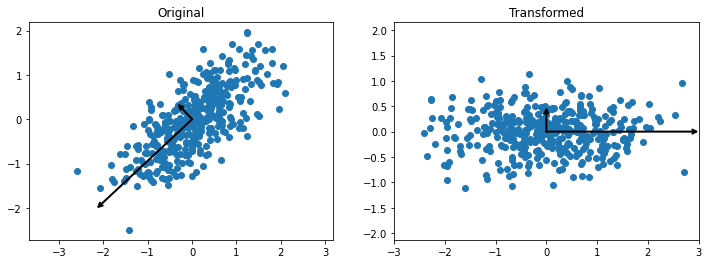

In [54]:
# Plot the principle axes
Z = pca.transform(X)
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].axis('equal')
axes[0].scatter(X[:,0], X[:,1])
axes[1].axis('equal')
axes[1].set_xlim(-3,3)
axes[1].scatter(Z[:,0], Z[:,1])
for l, v in zip(pca.explained_variance_, pca.components_):
    arrow([0,0], v*l*3, axes[0])
for l, v in zip([1.0,0.16], [np.array([1.0,0.0]),np.array([0.0,1.0])]):
    arrow([0,0], v*l*3, axes[1])
axes[0].set_title("Original")
axes[1].set_title("Transformed");

### Regression
We'll revisit the regression example from Intro to AI Part 1!

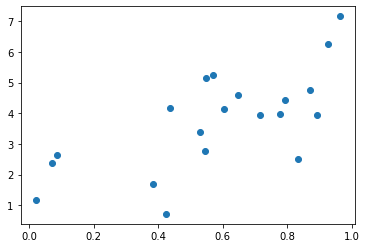

In [55]:
# Create some simple data
import numpy as np
import pylab as plt
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)
plt.plot(X.squeeze(), y, 'o');

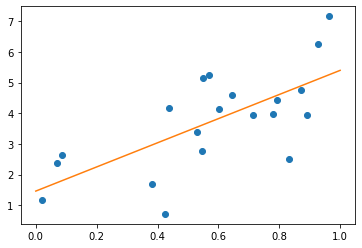

In [56]:
# Build the line of best fit
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

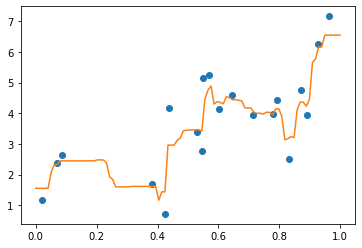

In [57]:
# We can use a better model for regression for improved accuracy
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

### Stat Tests
Another must have analysis technique are statistical tests. This section will show a few examples of how to perform these in python

#### Normality Testing (Shapiro-Wilk Test)
Assumes IID<br>
HO: sample is Gaussian<br>
H1: sample is not Gaussian

In [58]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


#### Time series stationarity (Kwiatkowski-Phillips-Schmidt-Shin)
Assumes data are temporally ordered<br>
HO: time series trend is not stationary<br>
H1: time series trend is stationary

In [59]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data, nlags='auto')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.594, p=0.023
Probably Stationary


#### Significant difference of means (t-test )
Assumes 1) IID, 2) normalality, 3) equal variance<br>
HO: means are equal<br>
H1: means are unequal

In [60]:
# Example of the t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


### Correlation Analysis
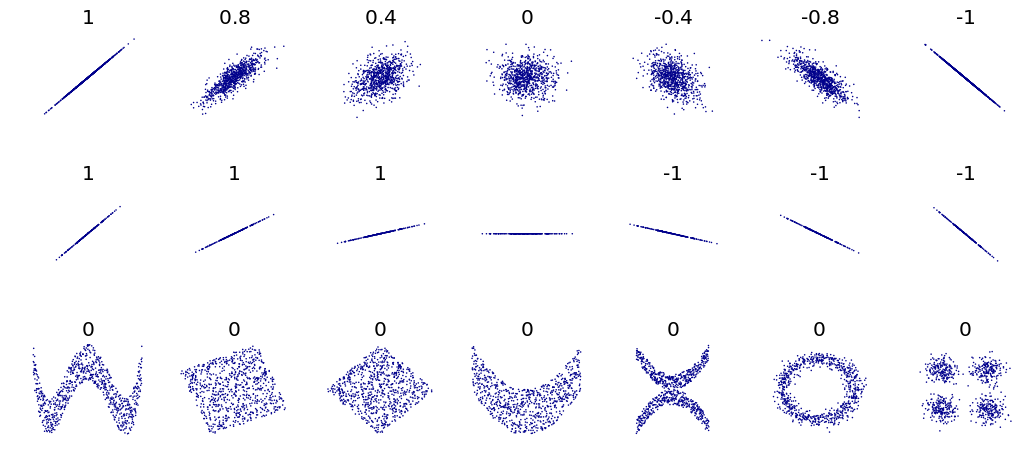

#### Pearson's Correlation Coefficient
Measures linear correlation between variables.

In [61]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


#### Correlation Matrix
Displays pair-wise correlations between multiple variables.

In [62]:
import pandas as pd

data = {'A': [45,37,42,35,39],
        'B': [38,31,26,28,33],
        'C': [10,15,17,21,12]
        }

df = pd.DataFrame(data,columns=['A','B','C'])
df

,A,B,C
0,45,38,10
1,37,31,15
2,42,26,17
3,35,28,21
4,39,33,12


In [63]:
df.corr()

,A,B,C
A,1.000000,0.518457,-0.701886
B,0.518457,1.000000,-0.860941
C,-0.701886,-0.860941,1.000000


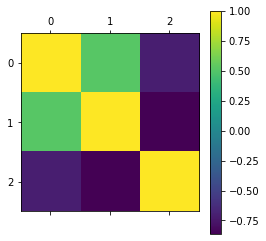

In [64]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.colorbar()
plt.show()

## Viz
This section will showcase some of the most basic plot types. There are many, many other ways of interpreting and displaying information.

### Histograms
Histograms are great for quickly viewing the shape of the data. It is similar to a bar chart and shows the frequency of data points that fall into bins.

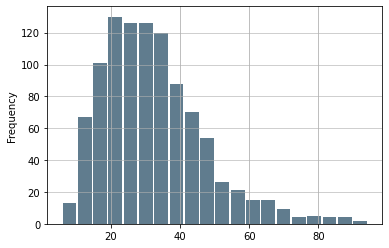

In [65]:
import pandas as pd

# Generate data
size, scale = 1000, 10
data = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

data.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.grid(axis='y', alpha=0.75)

### Box and Whisker
Aka Box plot. This shows the basic shape of each variable in a data set. It provides a quick view of summary stats for the different variables in a data set.

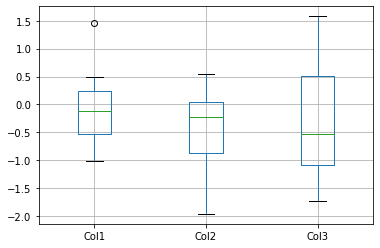

In [66]:
import numpy as np
import pandas as pd

# Generate data
np.random.seed(42)
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])

# Plot the box plot (very convienient with pandas)
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

### Scatter Plot
A scatter plot shows x, y points without connection. This is one of the most basic plots one can make.

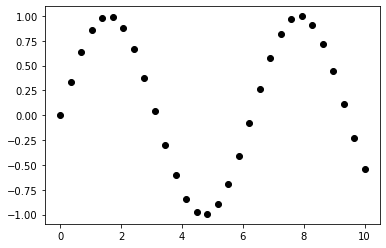

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Create some fake data to plot
x = np.linspace(0, 10, 30)
y = np.sin(x)

# Plot it, so basic, it's just the "plot()" method
plt.plot(x, y, 'o', color='black');

### Line Plot
A line plot is like a scatter plot but the lines are connected.

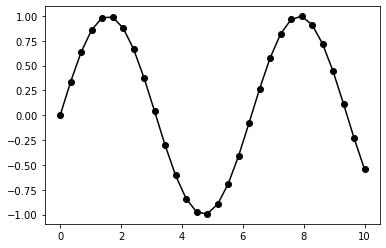

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Create some fake data to plot
x = np.linspace(0, 10, 30)
y = np.sin(x)

# Plot it, this time, pass in the option to connect the lines
plt.plot(x, y, '-ok')
plt.show()

### Networks / Graphs
One common data structure is a network (aka graph). These are constructed mainly of nodes and edges. Analysis over networks is an entirely separate field of study. In this section, we'll only create and plot a graph.

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G=nx.Graph()

# adding just one node:
G.add_node('a')

# adding a list of nodes:
G.add_nodes_from(['b', 'c'])

# adding single edges:
G.add_edge(1,2)
edge = ("d", "e")
G.add_edge(*edge)
edge = ("a", "b")
G.add_edge(*edge)

# adding a list of edges:
G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

print('Nodes of graph: {}'.format(G.nodes()))
print('Edges of graph: {}'.format(G.edges()))

Nodes of graph: ['a', 'b', 'c', 1, 2, 'd', 'e']
Edges of graph: [('a', 'b'), ('a', 'c'), ('a', 1), ('a', 2), ('c', 'd'), (1, 2), (1, 'd'), ('d', 'e')]


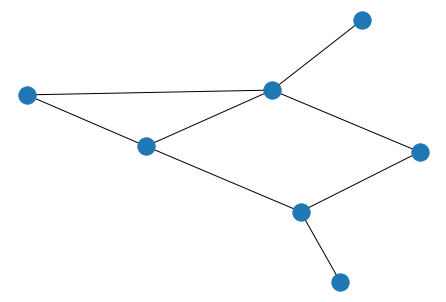

In [70]:
# And let's plot it
nx.draw(G)
plt.show()

### Images
Often times, you'll have images, either a common file type or the raw RGB array. Either way, plotting them is fairly straight forward.

In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load in the image
img = mpimg.imread('bwsi_logo.png')

In [72]:
# An image is just an RGB ndarray
img

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

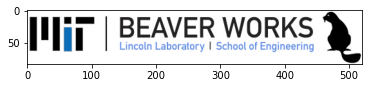

In [73]:
imgplot = plt.imshow(img)